https://nbviewer.jupyter.org/github/Sundar0989/Variable-Selection-Using-Python/blob/master/Variable%20Selection%20using%20Python%20-%20Vote%20based%20approach.ipynb

In [1]:
import pandas as pd

df = pd.read_csv("nba.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
Number                           486 non-null int64
Season_Start                     486 non-null int64
Player_Name                      486 non-null object
Salary                           484 non-null float64
Position                         486 non-null object
Age                              486 non-null int64
Team                             486 non-null object
Games_Played                     486 non-null int64
Games_Started                    486 non-null int64
Minutes_Played                   486 non-null int64
Player_Efficiency_Rating         486 non-null float64
True_Shooting_Pct                485 non-null float64
Three_Point_Attempt_Rate         485 non-null float64
Free_Throw_Rate                  485 non-null float64
Offensive_Rebound_Pct            486 non-null float64
Defensive_Rebound_Pct            486 non-null float64
Total_Rebound_Pct                486 non-null 

This code chunk will change all of object classes to numerical values.

In [3]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i])

The `features` DataFrame is everything but Salary (which is what we want to predict).  

Salary will be its own DataFrame called `labels`.

In [4]:
features = df[df.columns.difference(["Salary"])]
labels = df["Salary"]

There are some null values that we need to replace with 0.

In [5]:
pd.set_option('display.max_rows', 500)
labels.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [6]:
labels = labels.fillna(0)

In [7]:
pd.set_option('display.max_columns', 500)
features.isnull().values.any()


True

In [8]:
features.isnull().sum()

Age                               0
Assists                           0
Assists_Pct                       0
Blocks                            0
Blocks_Pct                        0
Box_Plus_Minus                    0
Defensive_Box_Plus_Minus          0
Defensive_Rebound_Pct             0
Defensive_Rebounds                0
Defensive_Win_Shares              0
Effective_Field_Goal_Pct          1
Field_Goal_Pct                    1
Field_Goals                       0
Field_Goals_Attempted             0
Free_Throw_Rate                   1
Free_Throws                       0
Free_Throws_Attempted             0
Free_Throws_Pct                  15
Games_Played                      0
Games_Started                     0
Minutes_Played                    0
Number                            0
Offensive_Box_Plus_Minus          0
Offensive_Rebound_Pct             0
Offensive_Rebounds                0
Offensive_Win_Shares              0
Personal_Fouls                    0
Player_Efficiency_Rating    

In [9]:
features = features.fillna(0)

In [10]:
features.isnull().sum()

Age                              0
Assists                          0
Assists_Pct                      0
Blocks                           0
Blocks_Pct                       0
Box_Plus_Minus                   0
Defensive_Box_Plus_Minus         0
Defensive_Rebound_Pct            0
Defensive_Rebounds               0
Defensive_Win_Shares             0
Effective_Field_Goal_Pct         0
Field_Goal_Pct                   0
Field_Goals                      0
Field_Goals_Attempted            0
Free_Throw_Rate                  0
Free_Throws                      0
Free_Throws_Attempted            0
Free_Throws_Pct                  0
Games_Played                     0
Games_Started                    0
Minutes_Played                   0
Number                           0
Offensive_Box_Plus_Minus         0
Offensive_Rebound_Pct            0
Offensive_Rebounds               0
Offensive_Win_Shares             0
Personal_Fouls                   0
Player_Efficiency_Rating         0
Player_Name         

In [11]:
features

,Age,Assists,Assists_Pct,Blocks,Blocks_Pct,Box_Plus_Minus,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Defensive_Rebounds,Defensive_Win_Shares,Effective_Field_Goal_Pct,Field_Goal_Pct,Field_Goals,Field_Goals_Attempted,Free_Throw_Rate,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Games_Played,Games_Started,Minutes_Played,Number,Offensive_Box_Plus_Minus,Offensive_Rebound_Pct,Offensive_Rebounds,Offensive_Win_Shares,Personal_Fouls,Player_Efficiency_Rating,Player_Name,Points,Position,Season_Start,Steals,Steals_Pct,Team,Three_Point_Attempt_Rate,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Total_Rebound_Pct,Total_Rebounds,True_Shooting_Pct,Turnovers,Turnovers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Usage_Pct,Value_Over_Replacement_Player,Win_Shares,Win_Shares/48
0,24,4,3.8,13,7.2,-5.6,1.9,20.9,28,0.2,0.46,0.405,17,42,0.476,9,20,0.450,22,0,163,24304,-7.5,5.4,8,-0.2,21,8.4,0,48,0,2017,1,0.3,6,0.238,5,10,0.500,12.8,36,0.472,10,16.4,12,32,0.38,17.6,-0.1,0.0,-0.001
1,32,125,20.7,9,0.9,-4.6,-2.6,6.3,51,0.5,0.48,0.403,121,300,0.133,32,40,0.800,65,0,894,24165,-2.1,2.3,18,-0.2,93,9.5,1,322,3,2017,25,1.4,11,0.427,48,128,0.375,4.3,69,0.507,66,17.2,73,172,0.42,19.2,-0.6,0.3,0.016
2,21,150,10.5,40,1.4,-0.7,-0.4,14.1,289,1.7,0.50,0.454,393,865,0.251,156,217,0.719,80,72,2298,24289,-0.2,5.3,116,2.0,172,14.4,2,1019,4,2017,64,1.4,21,0.309,77,267,0.288,9.6,405,0.530,89,8.5,316,598,0.53,20.1,0.8,3.7,0.076
3,22,3,22.6,0,0.0,-11.6,-2.1,19.5,3,0.0,0.00,0.000,0,4,0.500,1,2,0.500,5,0,17,24315,-9.6,0.0,0,-0.1,2,-2.2,3,1,5,2017,0,0.0,4,0.500,0,2,0.000,9.7,3,0.102,0,0.0,0,2,0.00,12.9,0.0,-0.1,-0.146
4,25,7,8.0,7,4.4,-1.5,0.7,21.0,24,0.2,0.45,0.426,23,54,0.352,14,19,0.737,18,0,135,24523,-2.2,7.7,9,0.0,32,14.4,4,63,1,2017,8,3.0,17,0.278,3,15,0.200,14.3,33,0.505,8,11.4,20,39,0.51,23.1,0.0,0.2,0.086
5,30,337,24.4,87,3.3,3.1,2.1,18.6,369,2.7,0.53,0.473,379,801,0.169,108,135,0.800,68,68,2193,24343,1.0,4.9,95,3.6,138,17.7,5,952,0,2017,52,1.2,1,0.302,86,242,0.355,11.8,464,0.553,116,11.9,293,559,0.52,19.8,2.8,6.3,0.137
6,32,57,11.0,16,1.5,-3.1,-1.5,24.2,203,1.1,0.50,0.499,235,471,0.180,65,85,0.765,66,1,931,24366,-1.5,9.2,75,1.2,125,18.9,6,535,0,2017,19,1.0,11,0.002,0,1,0.000,16.8,278,0.526,33,6.1,235,470,0.50,26.1,-0.3,2.3,0.119
7,34,11,4.9,0,0.0,-4.9,-2.3,7.4,21,0.1,0.46,0.375,30,80,0.200,12,16,0.750,30,0,308,24109,-2.6,1.1,3,0.0,35,5.0,8,86,4,2017,3,0.5,12,0.550,14,44,0.318,4.4,24,0.494,7,7.4,16,36,0.44,13.7,-0.2,0.1,0.020
8,24,23,5.2,32,3.7,-1.7,0.2,31.2,198,0.9,0.52,0.517,138,267,0.419,70,112,0.625,47,0,708,24660,-1.8,14.0,94,1.1,125,19.5,9,346,0,2017,27,1.8,23,0.004,0,1,0.000,22.4,292,0.547,37,10.5,138,266,0.52,20.9,0.1,2.1,0.142
9,25,30,7.5,5,0.6,-4.2,-0.9,17.7,103,0.9,0.45,0.399,99,248,0.315,60,78,0.769,42,0,653,24174,-3.3,3.1,17,-0.1,50,11.6,10,283,5,2017,18,1.4,29,0.306,25,76,0.329,10.6,120,0.501,35,11.0,74,172,0.43,22.7,-0.4,0.8,0.056


# Variable Importance

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9917695473251029


In [13]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [14]:
VI = VI.reset_index()

**Larger values are more important**

In [15]:
VI.sort_values(['RF'],ascending=0)

,index,RF
0,Age,0.040484
14,Free_Throw_Rate,0.029581
7,Defensive_Rebound_Pct,0.027857
21,Number,0.027216
35,Three_Point_Attempt_Rate,0.026071
28,Player_Name,0.025928
34,Team,0.024984
47,Usage_Pct,0.024292
45,Two_Pointers_Attempted,0.024011
26,Personal_Fouls,0.022817


# Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Future

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence th

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence th

In [17]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

**All non-important variables are removed.  The list below indicate the most important variables.**

In [18]:
Selected[Selected['RFE'] == True]

,index,RFE
0,Age,True
2,Assists_Pct,True
3,Blocks,True
4,Blocks_Pct,True
5,Box_Plus_Minus,True
6,Defensive_Box_Plus_Minus,True
7,Defensive_Rebound_Pct,True
15,Free_Throws,True
16,Free_Throws_Attempted,True
18,Games_Played,True


# Variable Importance - Extratrees Classifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.03327224 0.01795373 0.01688315 0.01967828 0.01959404 0.01796931
 0.01722745 0.01547331 0.01857692 0.01908821 0.01850311 0.02093102
 0.01673984 0.02080553 0.01664753 0.02265161 0.01846936 0.0279012
 0.01857594 0.02024684 0.0191581  0.02254182 0.01938142 0.01743657
 0.02167984 0.01774741 0.02056758 0.02230103 0.0214349  0.01737735
 0.01908219 0.         0.01998659 0.02005735 0.02087081 0.02141582
 0.02043979 0.02178408 0.01733852 0.02114438 0.02059544 0.01455889
 0.02214642 0.02385843 0.02136143 0.01967056 0.01780458 0.02119339
 0.02127452 0.01967405 0.01892813]


C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [21]:
FI = FI.reset_index()

**Larger values are more important.**

In [22]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
0,Age,0.033272
17,Free_Throws_Pct,0.027901
43,Turnovers_Pct,0.023858
15,Free_Throws,0.022652
21,Number,0.022542
27,Player_Efficiency_Rating,0.022301
42,Turnovers,0.022146
37,Three_Pointers_Attempted,0.021784
24,Offensive_Rebounds,0.021680
28,Player_Name,0.021435


# Chi Square

In [23]:
df1 = df.copy()
df1 = df1.fillna(0)

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df1[i] = d[i].transform(df1[i])

In [24]:
features1 = df1[df1.columns.difference(['Salary'])]
labels1 = df1['Salary']

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features1, labels1)

In [26]:
import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)

[ 1048.68004009 20245.00042894 13264.49383096  8766.70405568
  3914.02649274  4819.2883189   2403.34406098  8291.9666534
 21793.28411105  3529.08587892   764.96484377  9649.36334342
 27179.60086379 30812.32981233 15407.23469531 18897.23701919
 21242.625582   12438.89348045  4450.06874111 13235.76067144
 31888.48677989 26747.82498308  3786.26217029  8851.02552039
 13025.38000571  4642.88030391 14645.26676601  8269.3625172
 26366.51988347 30580.51079845   424.12950672            nan
  9173.78383218  1143.7649928   1775.61359771 20417.21299941
 17381.83252174 26266.40266554 12738.19357707  7711.02392438
 25068.39044539  7687.23663324 15077.62511276  7426.20696736
 23515.40635304 27591.86709448   958.53002283  8654.89313924
  2879.98187798  8481.5640495   8894.12669437]


In [27]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features1.columns)

In [28]:
chi_sq = chi_sq.reset_index()

**Larger values are more important.**

In [29]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
20,Minutes_Played,31888.49
13,Field_Goals_Attempted,30812.33
29,Points,30580.51
45,Two_Pointers_Attempted,27591.87
12,Field_Goals,27179.60
21,Number,26747.82
28,Player_Name,26366.52
37,Three_Pointers_Attempted,26266.40
40,Total_Rebounds,25068.39
44,Two_Pointers,23515.41


# Lasso Regression (L1) Feature Selection

In [30]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [31]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)

In [33]:
l1 = l1.reset_index()

**All non-important variables are removed.  The list below indicate the most important variables.**

In [34]:
l1[l1['L1'] == True]

,index,L1
0,Age,True
1,Assists,True
2,Assists_Pct,True
3,Blocks,True
7,Defensive_Rebound_Pct,True
8,Defensive_Rebounds,True
12,Field_Goals,True
13,Field_Goals_Attempted,True
15,Free_Throws,True
16,Free_Throws_Attempted,True


# Combine All Results Together

In [35]:
from functools import reduce
dfs = [VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [36]:
final_results.head()

,index,RF,RFE,Extratrees,Chi_Square,L1
0,Age,0.04,True,0.03,1048.68,True
1,Assists,0.02,False,0.02,20245.00,True
2,Assists_Pct,0.02,True,0.02,13264.49,True
3,Blocks,0.02,True,0.02,8766.70,True
4,Blocks_Pct,0.02,True,0.02,3914.03,False


In [37]:
final_results.columns

Index(['index', 'RF', 'RFE', 'Extratrees', 'Chi_Square', 'L1'], dtype='object')

# Construct Scoring Table

In [38]:
columns = ['RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [39]:
score_table['final_score'] = score_table.sum(axis=1)

In [40]:
score_table.sort_values('final_score',ascending=0)

,index,RF,Extratrees,Chi_Square,RFE,L1,final_score
0,Age,1,1,0,1,1,4
7,Defensive_Rebound_Pct,1,0,0,1,1,3
15,Free_Throws,0,1,0,1,1,3
21,Number,1,1,0,0,1,3
16,Free_Throws_Attempted,0,0,0,1,1,2
2,Assists_Pct,0,0,0,1,1,2
29,Points,0,0,1,0,1,2
32,Steals,0,0,0,1,1,2
43,Turnovers_Pct,0,1,0,0,1,2
20,Minutes_Played,0,0,1,0,1,2


# Model Runs

In [49]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

Based on the feature selection and correlation matrix, we decided on the following features to include in our initial model runs:  
Age, Player_Efficiency_Rating, Blocks, Turnovers_Pct, Steals, Assists_Pct, Games_Started, Games_Played, Total_Rebounds, Field_Goals, Defensive_Box_Plus_Minus, Defensive_Rebound_Pct, Usage_Pct, and Free_Throws.

So before we can run the model, we need to make a subset of our DataFrame that includes only those features.  

In [42]:
nba_subset = df[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
0,1312611.00,24,8.40,13,16.40,1,3.80,0,22,36,17,1.90,20.90,17.60,9
1,2116955.00,32,9.50,9,17.20,25,20.70,0,65,69,121,-2.60,6.30,19.20,32
2,5504420.00,21,14.40,40,8.50,64,10.50,72,80,405,393,-0.40,14.10,20.10,156
3,365289.00,22,-2.20,0,0.00,0,22.60,0,5,3,0,-2.10,19.50,12.90,1
4,2022240.00,25,14.40,7,11.40,8,8.00,0,18,33,23,0.70,21.00,23.10,14


We now need to get our dataset ready for our model.  

The *first line* of code below creates an object of the target variable called "target_column".  
The *second line* gives us the list of all the features, excluding the target variable of Salary.  
The *third line* normalizes the predictors.  This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.  
The *fourth line* displays the summary of the normalized data.  We can see that all the independent variables have now been scaled between 0 and 1. The target variable (Salary) remains unchanged.

In [43]:
target_column = ['Salary'] 
predictors = list(set(list(nba_subset.columns))-set(target_column))
nba_subset[predictors] = nba_subset[predictors]/nba_subset[predictors].max()
nba_subset.describe()

C:\Users\jeffery.peterson.tm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
count,484.00,486.00,486.00,486.00,485.00,486.00,486.00,486.00,486.00,486.00,486.00,486.00,486.00,486.00,486.00
mean,6717243.85,0.66,0.41,0.11,0.29,0.25,0.23,0.31,0.66,0.20,0.24,-0.03,0.15,0.45,0.12
std,7376188.23,0.11,0.18,0.14,0.12,0.21,0.16,0.35,0.30,0.18,0.21,0.17,0.07,0.13,0.15
min,17224.00,0.47,-0.56,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,-0.59,0.00,0.00,0.00
25%,1471382.00,0.57,0.31,0.02,0.22,0.08,0.11,0.01,0.43,0.06,0.07,-0.13,0.10,0.35,0.03
50%,3343830.00,0.65,0.41,0.07,0.28,0.21,0.18,0.13,0.76,0.16,0.19,-0.02,0.14,0.43,0.08
75%,10040730.50,0.72,0.50,0.15,0.35,0.36,0.31,0.61,0.91,0.27,0.35,0.07,0.19,0.52,0.16
max,34682550.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Now to make the TEST and TRAINING datasets.  We will be using a 70/30 train/test ratio.

In [44]:
nba_subset.isnull().sum()

Salary                      2
Age                         0
Player_Efficiency_Rating    0
Blocks                      0
Turnovers_Pct               1
Steals                      0
Assists_Pct                 0
Games_Started               0
Games_Played                0
Total_Rebounds              0
Field_Goals                 0
Defensive_Box_Plus_Minus    0
Defensive_Rebound_Pct       0
Usage_Pct                   0
Free_Throws                 0
dtype: int64

In [45]:
nba_subset = nba_subset.fillna(0)

In [46]:
X = nba_subset[predictors].values
y = nba_subset[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(340, 14)
(146, 14)


## Ordinary Least Squares (OLS) Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Once the model is built on the training set, we can make the predictions.

The *first line* of code below predicts on the training set.  
The *second and third lines* of code prints the evaluation metrics - RMSE and R-squared - on the training set.  
The same steps are repeated on the test dataset in the *fourth to sixth lines*. 

In [50]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

4398500.604048523
0.6291022196013667
5024129.113206551
0.5703254640029768


The above output shows that the RMSE, one of the two evaluation metrics, is 4398500 for train data and 5024129 for test data. On the other hand, R-squared value is 0.63 for train data and 0.57 for test data, which is okay performance.

## Ridge Regression

The *first line* of code below instantiates the Ridge Regression model with an alpha value of 0.01.  
The *second line* fits the model to the training data.
The *third line* of code predicts, while the *fourth and fifth lines* print the evaluation metrics - RMSE and R-squared - on the training set.  
The same steps are repeated on the test dataset in the *sixth to eight lines* of code. 

In [51]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

4398504.065251823
0.6291016358783019
5024400.258308887
0.5702790849043549


The above output shows that the RMSE, one of the two evaluation metrics, is 4398504 for train data and 5024400 for test data. On the other hand, R-squared value is 0.63 for train data and 0.57 for test data, which is okay performance but not much better than what we had for the OLS model.  

Let's adjust the alpha value and see if we can improve our model.  See https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [52]:
rr = Ridge(alpha=10)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

4608384.533016991
0.5928613398039049
5203119.675662727
0.5391647796662253


That made it worse as we saw a decrease in the $R^2$ values and an increase in the RMSE values.  We will just go with alpha=0.01

## Lasso Regression

The *first line* of code below instantiates the Lasso Regression model with an alpha value of 0.01.  
The *second line* fits the model to the training data.
The *third line* of code predicts, while the *fourth and fifth lines* print the evaluation metrics - RMSE and R-squared - on the training set.  
The same steps are repeated on the test dataset in the *sixth to eight lines* of code. 

In [53]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

4398500.604048534
0.6291022196013647
5024129.097827221
0.5703254666335249


The above output shows that the RMSE, one of the two evaluation metrics, is 4398500 for train data and 5024129 for test data. On the other hand, R-squared value is 0.63 for train data and 0.57 for test data, which is okay performance but not much better than what we had for the OLS model.  

Let's adjust the alpha value and see if we can improve our model.

In [54]:
model_lasso = Lasso(alpha=100)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

4398501.825707335
0.6291020135717919
5023973.483712449
0.5703520831417219


Increasing the alpha value did not have a significant impact on model performance.

## ElasticNet Regression

The *first line* of code below instantiates the ElasticNet Regression with an alpha value of 0.01.  
The *second line* fits the model to the training data.  
The *third line* of code predicts, while the *fourth and fifth lines* print the evaluation metrics - RMSE and R-squared - on the training set.  
The same steps are repeated on the test dataset in the *sixth to eight lines* of code. 

In [55]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

4432638.004411471
0.6233226956312694
5070003.05731645
0.5624431614363001


The above output shows that the RMSE, one of the two evaluation metrics, is 4432638 for train data and 5070003 for test data. On the other hand, R-squared value is 0.62 for train data and 0.56 for test data, which is okay performance but is slightly worse than what we had for the OLS model.  

Let's adjust the alpha value and see if we can improve our model.

In [57]:
model_enet = ElasticNet(alpha = 10)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

7010747.192421632
0.05773396689365351
7488845.26471534
0.04534215042840484


That made it much, much worse.

## Model Summary Table

| Model | Train RMSE | Train $R^2$ | Test RMSE | Test $R^2$ |  
|-------|------------|-------------|-----------|------------|  
| OLS | 4398500 | 0.63 | 5024129 | 0.57 |  
| Ridge | 4398504 | 0.63 | 5024400 | 0.57 |  
| Lasso | 4398500 | 0.63 | 5024129 | 0.57 |  
| ElasticNet | 4432638 | 0.62 | 5070003 | 0.56 |

It looks like the OLS and Lasso models performed the best.

# Salary Predictions

Since our OLS model performed as well as the Lasso model, we will just look at the OLS predictions.  To do that, we will see how well our model is able to predict player salaries for both our test and training sets.  

First our training set.  We will need to combine the arrays into a dataframe.

In [68]:
train_predictions = pd.DataFrame(np.concatenate([y_train, pred_train_lr], axis=1), columns= ['Salary','Prediction'])
train_predictions

,Salary,Prediction
0,7000000.00,3546015.38
1,3097800.00,715688.41
2,4000000.00,3423129.04
3,2133542.00,7941445.10
4,10497319.00,7796035.42
5,21974719.00,17510578.05
6,2203000.00,8622037.52
7,13788500.00,10993070.03
8,1023838.00,1500056.20
9,16661641.00,4682012.67


We can make some scatter plots to see how well our predicted salaries correlate to the actual salaries.  

We will use R to make the plots, so we need to load some libraries first.

In [81]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
utils = importr('utils')
utils.install_packages('ggplot2')
utils.install_packages('ggthemes')
utils.install_packages('gridExtra')
utils.install_packages('grid')
%reload_ext rpy2.ipython
%R library(ggplot2)
%R library(gridExtra)
%R library(grid)

array(['grid', 'gridExtra', 'ggplot2', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

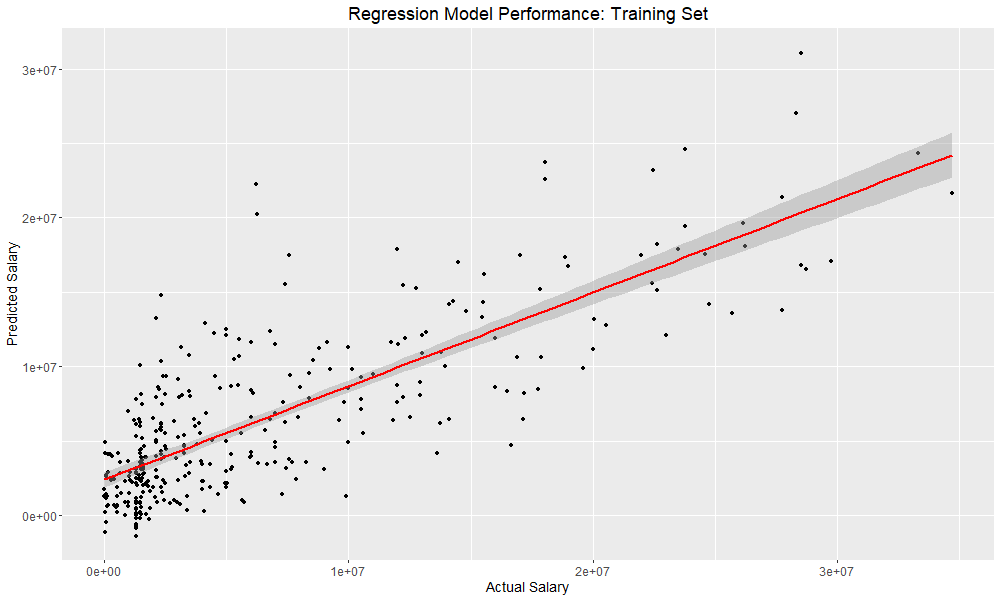

In [76]:
%%R -i train_predictions -w 1000 -h 600 -u px
train_scatter <- ggplot(train_predictions, aes(Salary, Prediction)) + geom_point() + 
geom_smooth(method='lm', colour = "red") +
labs(x = "Actual Salary", y = "Predicted Salary")
train_scatter + ggtitle("Regression Model Performance: Training Set") + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

Now for the test data set.  First, we will need to combine the arrays into a dataframe.

In [77]:
test_predictions = pd.DataFrame(np.concatenate([y_test, pred_test_lr], axis=1), columns= ['Salary','Prediction'])
test_predictions

,Salary,Prediction
0,564868.00,3954756.26
1,1780800.00,-323861.73
2,191810.00,2799533.42
3,3300000.00,10843222.38
4,25000000.00,18785301.99
5,15280000.00,7052909.19
6,1312611.00,620728.17
7,874636.00,698955.27
8,0.00,1900361.51
9,7000000.00,3318112.96


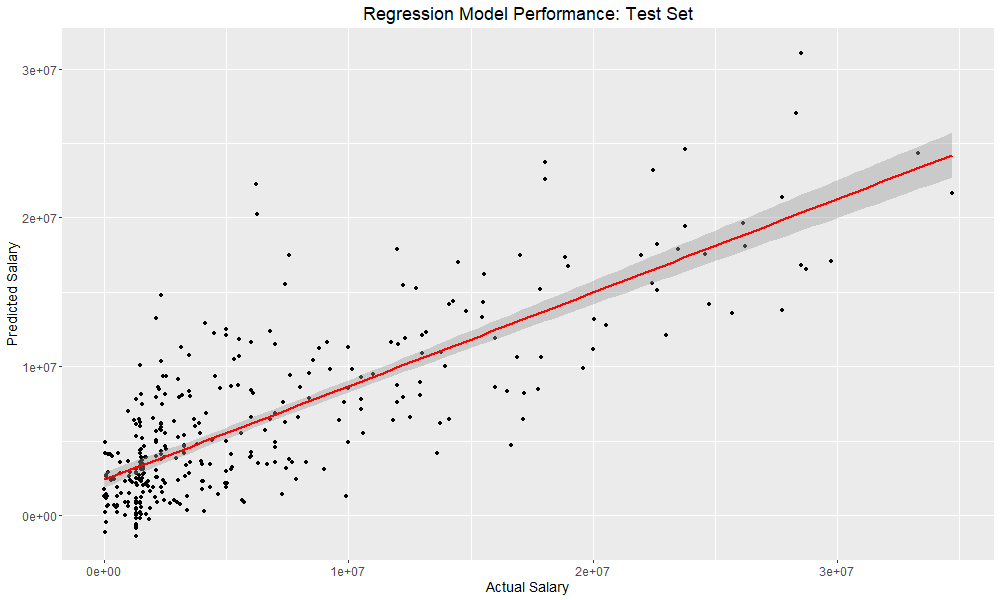

In [78]:
%%R -i test_predictions -w 1000 -h 600 -u px
test_scatter <- ggplot(test_predictions, aes(Salary, Prediction)) + geom_point() + 
geom_smooth(method='lm', colour = "red") +
labs(x = "Actual Salary", y = "Predicted Salary")
train_scatter + ggtitle("Regression Model Performance: Test Set") + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

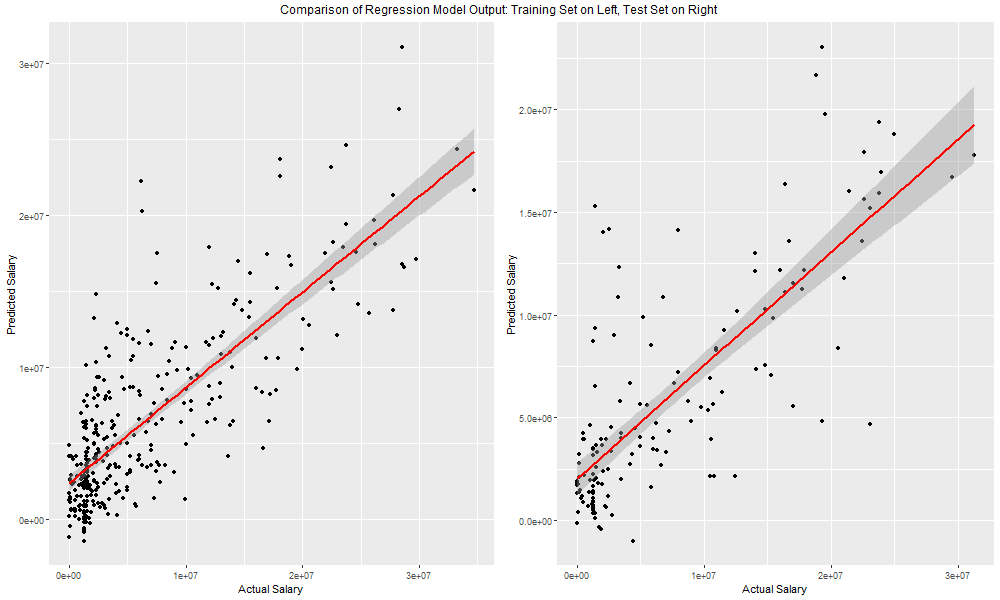

In [82]:
%%R -w 1000 -h 600 -u px

grid.arrange(train_scatter, test_scatter, nrow = 1, top = "Comparison of Regression Model Output: Training Set on Left, Test Set on Right")